In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import math
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

In [2]:
p3df = pd.read_csv('../input/blahblah-blah/ICAM1-Expression-Data_new_1.csv',index_col=None)
p3df

,Treatment,Endothelial,Keratinocytes,Fibroblasts
0,t0,64.287296,7.473675,64.810103
1,t0,88.208896,-6.010114,58.040335
2,t0,56.548492,-3.340292,53.427446
3,t0,89.058240,-0.812873,53.635054
4,t0,79.242357,0.068686,46.587244
...,...,...,...,...
115,t10000,-5.551946,-4.651971,-1.030688
116,t10000,-6.175387,-4.454223,-0.595157
117,t10000,-6.097735,-4.454223,-0.856715
118,t10000,-5.708284,-4.717767,-0.856715


In [16]:
# Pearson's correlation
corrdf = pd.read_csv('../input/new-corr/new.csv',names=["RFU","Cell_count"])
corrdf


,RFU,Cell_count
0,19765.6900,0
1,97978.6400,50
2,170998.2120,100
3,304120.7073,200


significance 0.0007554066309445329
correlation 0.9992445933690555


<AxesSubplot:xlabel='RFU', ylabel='Cell_count'>

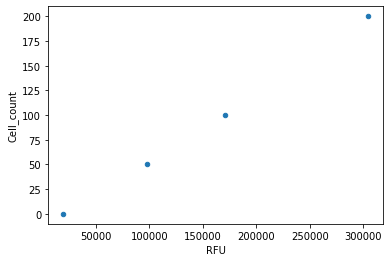

In [19]:
[r,p] = st.pearsonr(corrdf["RFU"], corrdf["Cell_count"])
print('significance',p)
print('correlation',r)
corrdf.plot.scatter(x = 'RFU', y = 'Cell_count')

In [3]:
# One way ANOVA
model = ols('Endothelial ~ Treatment', data=p3df).fit()          
aov_table = sm.stats.anova_lm(model)
print(aov_table)

# F-critical value for 
f_crit = st.f.ppf(1-.05, 4, 115)
print('F-critical =',f_crit)

              df        sum_sq       mean_sq            F         PR(>F)
Treatment    4.0  2.509576e+07  6.273939e+06  5068.149918  2.926285e-128
Residual   115.0  1.423602e+05  1.237915e+03          NaN            NaN
F-critical = 2.450570517502327


In [4]:
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
if (model.fvalue)>f_crit:
    print("Statistically significant")
else:
    print("Not statistically significant")
    
if (model.f_pvalue)<0.05:
    print("reject null hypothesis")
else:
    print("cannot reject null hypothesis") 

Overall model F( 4, 115) =  5068.150, p =  0.0000
Statistically significant
reject null hypothesis


In [5]:
# Post-Hoc test - Bonfferoni 
comp = mc.MultiComparison(p3df['Endothelial'], p3df['Treatment'])
tbl, a1, a2 = comp.allpairtest(st.ttest_ind, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
t0,t10,-55.9418,0.0,0.0,True
t0,t100,-104.4378,0.0,0.0,True
t0,t1000,-38.3782,0.0,0.0,True
t0,t10000,16.5877,0.0,0.0,True
t10,t100,-47.4843,0.0,0.0,True
t10,t1000,19.2001,0.0,0.0,True
t10,t10000,73.5309,0.0,0.0,True
t100,t1000,67.6438,0.0,0.0,True
t100,t10000,123.1529,0.0,0.0,True
t1000,t10000,57.0901,0.0,0.0,True


In [6]:
p4df = pd.read_csv('../input/column-wise/ICAM1-Expression-Data_new_column.csv',index_col=None)
cols = list(p4df)
cols = [i.strip().replace(' ', '_') for i in cols]
p4df.columns = cols

In [7]:
#Two-way anova does dosing and drug influence cytokine level
model3 = ols('Exp ~ C(Treatment) + C(Cell_type) + C(Treatment):C(Cell_type)', data=p4df).fit()
aov_table = sm.stats.anova_lm(model3)
print(aov_table)

                              df        sum_sq       mean_sq            F  \
C(Treatment)                 4.0  4.058461e+07  1.014615e+07  2205.601924   
C(Cell_type)                 2.0  4.942026e+06  2.471013e+06   537.156500   
C(Treatment):C(Cell_type)    8.0  3.682770e+06  4.603462e+05   100.071486   
Residual                   345.0  1.587060e+06  4.600174e+03          NaN   

                                  PR(>F)  
C(Treatment)               3.228514e-244  
C(Cell_type)               1.097255e-106  
C(Treatment):C(Cell_type)   3.767328e-85  
Residual                             NaN  


In [8]:
# F-critical value for Drug
f_crit_drug = st.f.ppf(1-.05, 4, 345)
print('F-critical for drug =',f_crit_drug)

print(f"Overall model F({2},{model3.df_resid: .0f}) = {2205.601924}, p = {3.228514e-244}")
if (2205.601924)>f_crit:
    print("Statistically significant")
else:
    print("Not statistically significant")
    
if (3.228514e-244)<0.05:
    print("reject null hypothesis")
else:
    print("cannot reject null hypothesis") 

F-critical for drug = 2.397828208487129
Overall model F(2, 345) = 2205.601924, p = 3.228514e-244
Statistically significant
reject null hypothesis


In [9]:
for t in p4df['Treatment'].unique():
    print(t)
    df = p4df[p4df['Treatment'] == t]
    comp = mc.MultiComparison(df['Exp'], df['Cell_type'])
    bftbl, a1, a2 = comp.allpairtest(st.ttest_ind, method= "bonf")
    print(bftbl)
    print()

t0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
   group1      group2      stat  pval pval_corr reject
------------------------------------------------------
Endothelial   Fibroblast  7.0078  0.0       0.0   True
Endothelial Keratinocyte 10.0503  0.0       0.0   True
 Fibroblast Keratinocyte  5.8696  0.0       0.0   True
------------------------------------------------------

t10
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
   group1      group2      stat  pval pval_corr reject
------------------------------------------------------
Endothelial   Fibroblast 11.7135  0.0       0.0   True
Endothelial Keratinocyte 31.3489  0.0       0.0   True
 Fibroblast Keratinocyte   25.68  0.0       0.0   True
------------------------------------------------------

t100
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
   group1      group2      stat   pval  pval_co

In [10]:
# Corrected alpha bonferroni
bonfalpha = 0.05/5
print('Corrected Alpha Bonferoni',bonfalpha)

Corrected Alpha Bonferoni 0.01


In [11]:
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Endothelial,Fibroblast,0.3283,0.9,-1.7749,2.4315,False
Endothelial,Keratinocyte,0.56,0.7798,-1.5432,2.6632,False
Fibroblast,Keratinocyte,0.2317,0.9,-1.8715,2.3349,False
